In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import  SVC
from sklearn.metrics import accuracy_score
import pickle



LOAD DATA

In [5]:
df=pd.read_csv("./Crop_recommendation.csv")
df.head() 

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [15]:
df.value_counts('label')
df.shape

(2200, 8)

CLEAN DATA


In [10]:
# DROP COLUMNS
newdf=df.drop(columns=['N','P','K',])
newdf


,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,coffee
2196,27.417112,56.636362,6.086922,127.924610,coffee
2197,24.131797,67.225123,6.362608,173.322839,coffee
2198,26.272418,52.127394,6.758793,127.175293,coffee


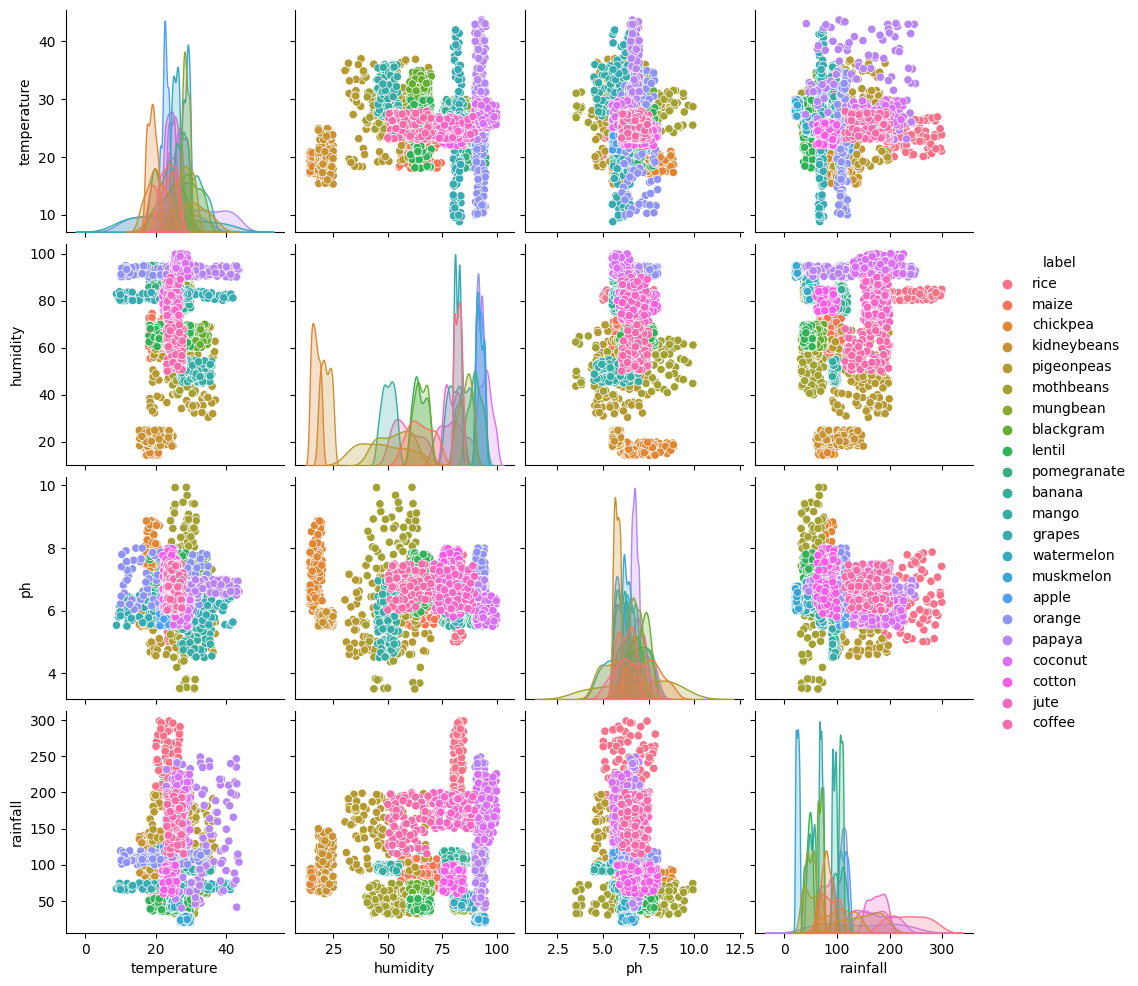

In [11]:
sns.pairplot(newdf,hue='label')

TARGET DATA


In [14]:
data=newdf.values
x=data[:,0:4]
y=data[:,4]
y

array(['rice', 'rice', 'rice', ..., 'coffee', 'coffee', 'coffee'],
      dtype=object)

SPLIT DATA

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

TRAIN MODEL

In [19]:
svn=SVC()
svn.fit(x_train,y_train)

SVC()

TRAIN USING ITS OWN DATA

In [20]:
prediction=svn.predict(x_test)
prediction

array(['grapes', 'watermelon', 'mango', 'kidneybeans', 'blackgram',
       'muskmelon', 'chickpea', 'blackgram', 'kidneybeans', 'watermelon',
       'chickpea', 'muskmelon', 'grapes', 'watermelon', 'banana', 'mango',
       'pigeonpeas', 'muskmelon', 'apple', 'blackgram', 'grapes',
       'blackgram', 'coffee', 'lentil', 'mango', 'watermelon',
       'watermelon', 'jute', 'jute', 'apple', 'banana', 'lentil',
       'grapes', 'apple', 'lentil', 'chickpea', 'maize', 'watermelon',
       'coconut', 'papaya', 'cotton', 'maize', 'rice', 'kidneybeans',
       'apple', 'banana', 'cotton', 'mango', 'blackgram', 'coconut',
       'mothbeans', 'apple', 'apple', 'watermelon', 'apple', 'apple',
       'maize', 'mothbeans', 'watermelon', 'grapes', 'banana', 'apple',
       'rice', 'apple', 'maize', 'apple', 'apple', 'lentil', 'grapes',
       'lentil', 'jute', 'apple', 'grapes', 'banana', 'grapes',
       'blackgram', 'kidneybeans', 'watermelon', 'grapes', 'blackgram',
       'chickpea', 'rice', 'w

MODEL ACCURACY

In [21]:
modelAccuracy=accuracy_score(y_test,prediction)
modelAccuracy=modelAccuracy*100
print("model accuracy is {:.2f}%".format(modelAccuracy))

model accuracy is 67.05%


TEST WITH OWN DATA

In [25]:
x_new=np.array([[10.130175,30.396475,90.779833,1.937041]])
svn.predict(x_new)

array(['mothbeans'], dtype=object)

SAVING THE MODEL


In [63]:
# Save the model
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)



USE PICKLE FILE TO PREDICT


In [66]:
def ValuePredictor(to_predict_list):
    to_predict = np.array(to_predict_list).reshape(1, 4)
    loaded_model = pickle.load(open("./SVM.pickle", "rb"))
    result = loaded_model.predict(to_predict)
    return result[0]

In [70]:
ValuePredictor(["10.130175","30.396475","1.779833","40.937041"])

'mothbeans'